<a href="https://colab.research.google.com/github/annantjain/Sales_Predictor_model/blob/main/Copy_of_ME781_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
sales_data = pd.read_csv('Train.csv')
sales_data_test = pd.read_csv('Test.csv')

In [ ]:
sales_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
sales_data.shape
#total number of features = 12
#total no of data points = 8523

(8523, 12)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Finding number of Missing (NaN) Values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Filling Missing Values by use of Mean for "Item_Weight" Column and Mode for "Outlet_Size" Column
print(sales_data['Item_Weight'].mean())
sales_data["Item_Weight"].fillna(sales_data['Item_Weight'].mean(), inplace=True)

print(sales_data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0])))
mode_outlet_size = sales_data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_data=sales_data['Outlet_Size'].isnull()
sales_data.loc[missing_data, 'Outlet_Size'] = sales_data.loc[missing_data, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

12.857645184135976
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
# Filling Missing Values by use of Mean for "Item_Weight" Column and Mode for "Outlet_Size" Column
print(sales_data_test['Item_Weight'].mean())
sales_data_test["Item_Weight"].fillna(sales_data_test['Item_Weight'].mean(), inplace=True)

print(sales_data_test.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0])))
mode_outlet_size = sales_data_test.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_data=sales_data_test['Outlet_Size'].isnull()
sales_data_test.loc[missing_data, 'Outlet_Size'] = sales_data_test.loc[missing_data, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

12.695633368756642
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
# "Item_visibility" column also has some values = 0, replacing it with mean values
sum(sales_data['Item_Visibility']==0)
sales_data.loc[:, 'Item_Visibility'].replace([0],[sales_data['Item_Visibility'].mean()],inplace=True)
sum(sales_data['Item_Visibility']==0)

0

In [ ]:
# "Item_visibility" column also has some values = 0, replacing it with mean values
sum(sales_data_test['Item_Visibility']==0)
sales_data_test.loc[:, 'Item_Visibility'].replace([0],[sales_data_test['Item_Visibility'].mean()],inplace=True)
sum(sales_data_test['Item_Visibility']==0)

0

In [ ]:
#checking for missing values
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Data Statistics
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Analyzing Categorical columns
categories = []
for x in sales_data.dtypes.index:
  if sales_data.dtypes[x] == 'object':
    categories.append(x)
categories.remove('Item_Identifier')
categories.remove('Outlet_Identifier')
categories

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# Analyzing Categorical features in dataset
for category in categories:
  print(category)
  print(sales_data[category].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [ ]:
# Merging the common categories of "Item_fat_content"
sales_data['Item_Fat_Content']=sales_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Merging the common categories of "Item_fat_content"
sales_data_test['Item_Fat_Content']=sales_data_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
sales_data_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
sales_data['New_Item_Type'] = sales_data['Item_Identifier'].apply(lambda x: x[:2])
sales_data['New_Item_Type']=sales_data['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR': 'Drinks'})
sales_data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
sales_data_test['New_Item_Type'] = sales_data_test['Item_Identifier'].apply(lambda x: x[:2])
sales_data_test['New_Item_Type']=sales_data_test['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR': 'Drinks'})
sales_data_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [ ]:
#Creating a new category "Non-Edible" under column Item_Fat_content
sales_data.loc[sales_data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
sales_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Creating a new category "Non-Edible" under column Item_Fat_content
sales_data_test.loc[sales_data_test['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
sales_data_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Modifying Outlet_Establishment_Year data to a small value data to improve model performance
sales_data['Outlet_Years_ago']=2013 - sales_data['Outlet_Establishment_Year']
sales_data['Outlet_Years_ago']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years_ago, Length: 8523, dtype: int64

In [ ]:
# Modifying Outlet_Establishment_Year data to a small value data to improve model performance
sales_data_test['Outlet_Years_ago']=2013 - sales_data_test['Outlet_Establishment_Year']
sales_data_test['Outlet_Years_ago']

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years_ago, Length: 5681, dtype: int64

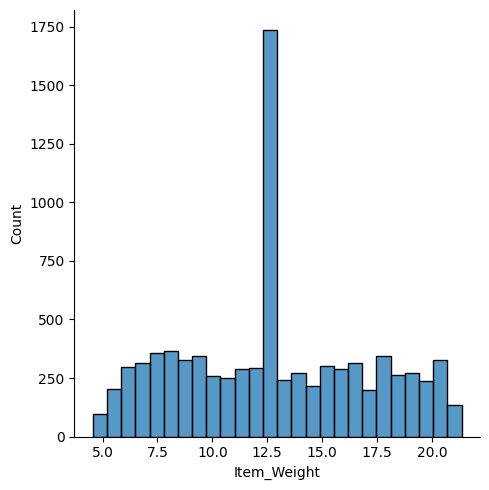

In [ ]:
sns.displot(sales_data['Item_Weight'])

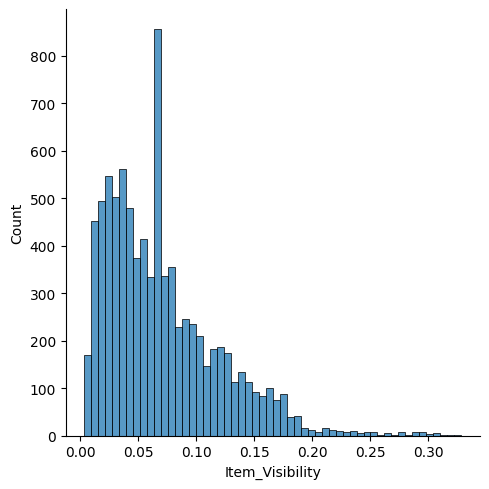

In [ ]:
sns.displot(sales_data['Item_Visibility'])

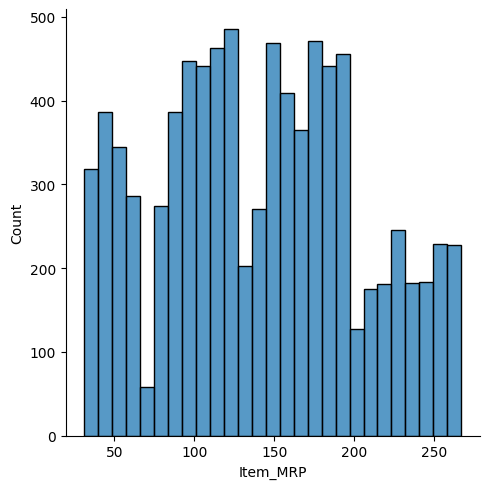

In [ ]:
sns.displot(sales_data['Item_MRP'])

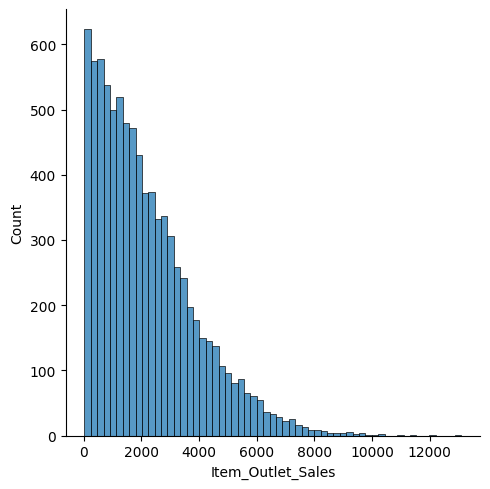

In [ ]:
sns.displot(sales_data['Item_Outlet_Sales'])

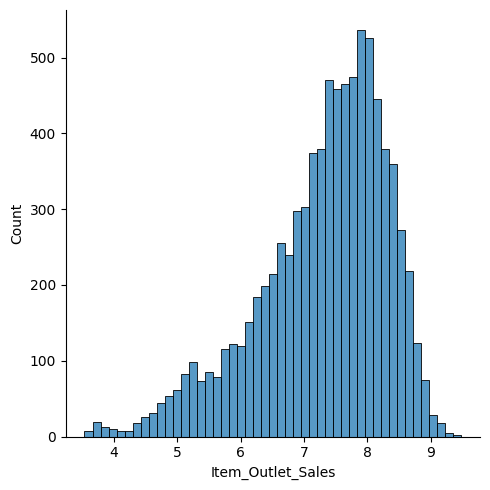

In [ ]:
# As shown above outlet sales data graph is left skewed and also have high values So to improve performance lets do Normalization
# Log Tranformation
sales_data['Item_Outlet_Sales']=np.log(1+sales_data['Item_Outlet_Sales'])
sns.displot(sales_data['Item_Outlet_Sales'])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

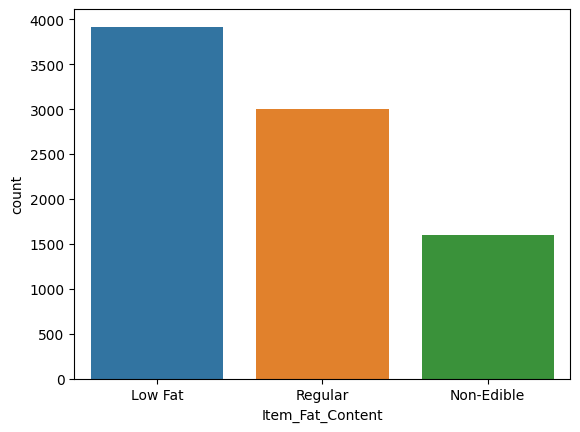

In [ ]:
sns.countplot(x='Item_Fat_Content', data=sales_data)

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

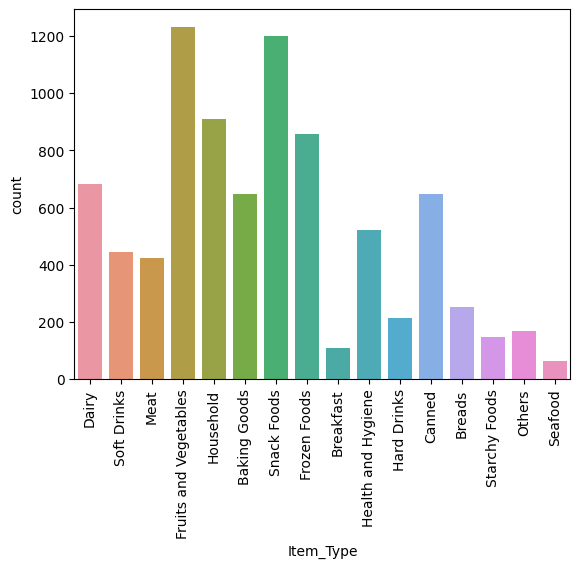

In [ ]:
label=list(sales_data['Item_Type'].unique())
graph=sns.countplot(x='Item_Type', data=sales_data)
graph.set_xticklabels(labels=label, rotation=90)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

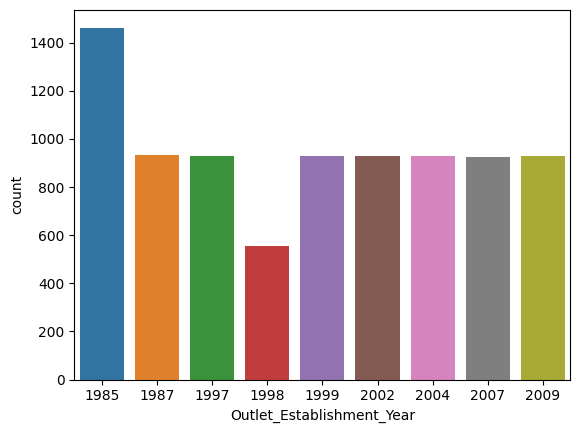

In [ ]:
sns.countplot(x='Outlet_Establishment_Year', data=sales_data)

<Axes: xlabel='Outlet_Type', ylabel='count'>

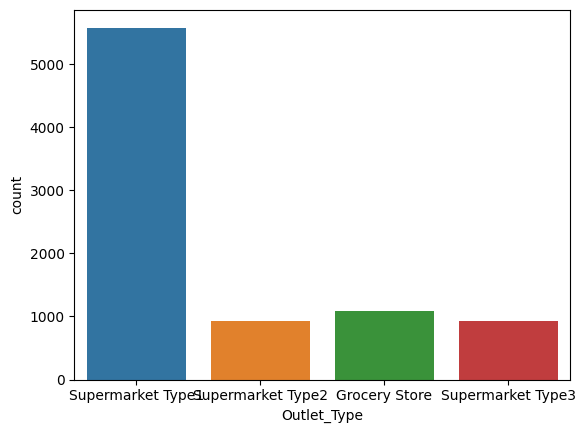

In [ ]:
sns.countplot(x='Outlet_Type', data=sales_data)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

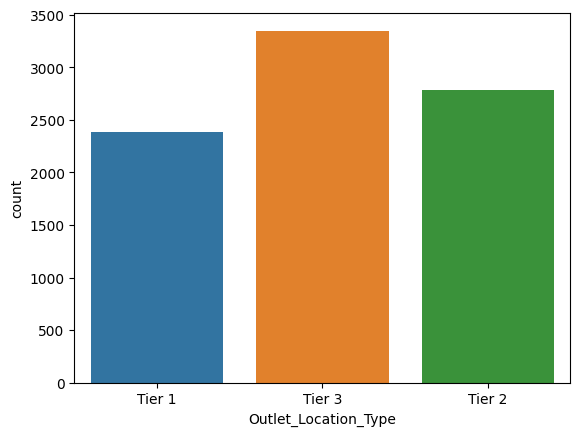

In [ ]:
sns.countplot(x='Outlet_Location_Type', data=sales_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sales_data['Outlet'] = LE.fit_transform(sales_data['Outlet_Identifier'])
categories = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for category in categories:
  sales_data[category] = LE.fit_transform(sales_data[category])

In [ ]:

LE1 = LabelEncoder()
sales_data_test['Outlet'] = LE1.fit_transform(sales_data_test['Outlet_Identifier'])
categories = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for category in categories:
  sales_data_test[category] = LE1.fit_transform(sales_data_test[category])

In [ ]:
sales_data=pd.get_dummies(sales_data, columns =['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
sales_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years_ago,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


# Test Train Splitting

In [ ]:
x = sales_data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', ])
y = sales_data['Item_Outlet_Sales']
xtest = sales_data_test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', ])


# Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    # train the model
    model.fit(x, y)

    # predict the training set
    pred = model.predict(x)

    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

# Linear Regression

Model Report
MSE: 0.2880065032501795
CV Score: 0.2891182742641596


<Axes: title={'center': 'Model Coefficients'}>

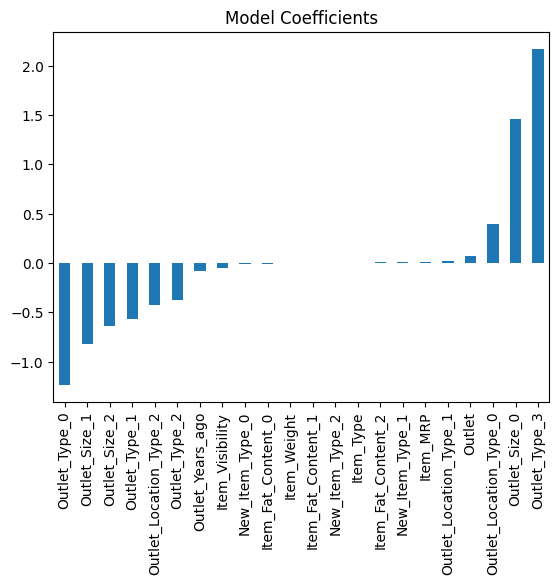

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model_1 = LinearRegression()
train(model_1, x, y)
coef = pd.Series(model_1.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


# Ridge Regression

Model Report
MSE: 0.2881919345594855
CV Score: 0.28930042565084746


<Axes: title={'center': 'Model Coefficients'}>

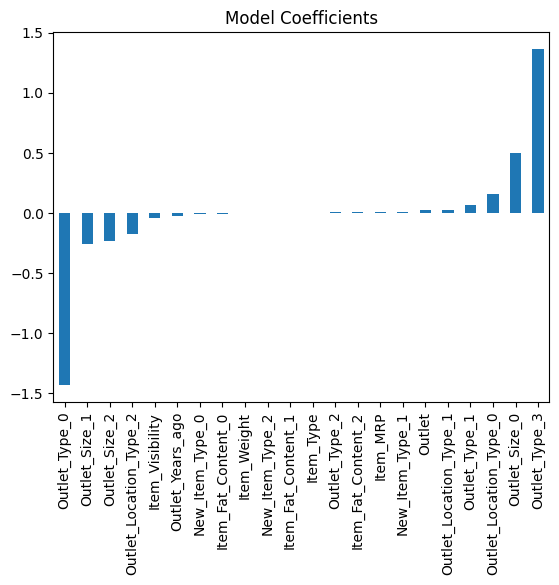

In [ ]:
model_2 = Ridge()
train(model_2, x, y)
coef_2 = pd.Series(model_2.coef_, x.columns).sort_values()
coef_2.plot(kind='bar', title="Model Coefficients")

# Lasso Regression

Model Report
MSE: 0.7628688679102087
CV Score: 0.7630789166281843


<Axes: title={'center': 'Model Coefficients'}>

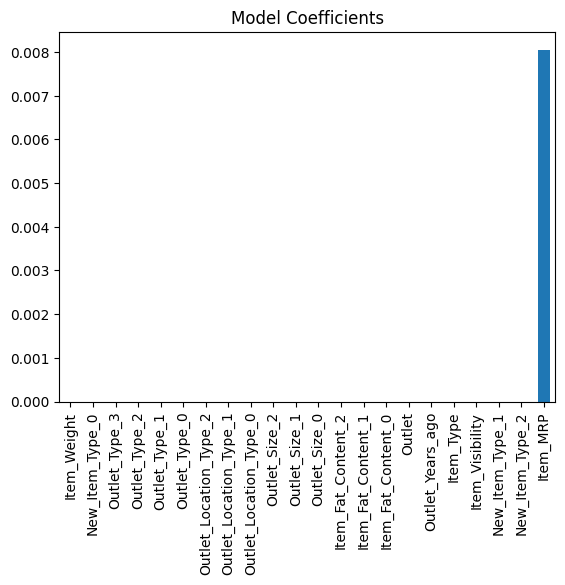

In [ ]:
model_3 = Lasso()
train(model_3, x, y)
coef = pd.Series(model_3.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# Decision Tree

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.575975472687331


<Axes: title={'center': 'Feature Importance'}>

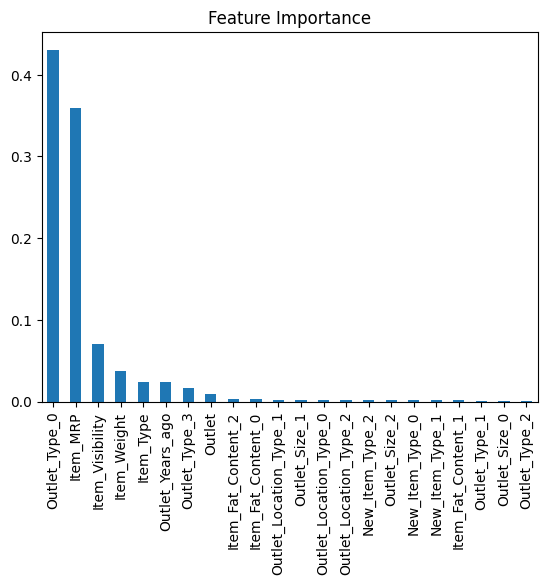

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_4 = DecisionTreeRegressor()
train(model_4, x, y)
coef = pd.Series(model_4.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

# Random Forest

Model Report
MSE: 0.0421304124601507
CV Score: 0.3103940762248968


<Axes: title={'center': 'Feature Importance'}>

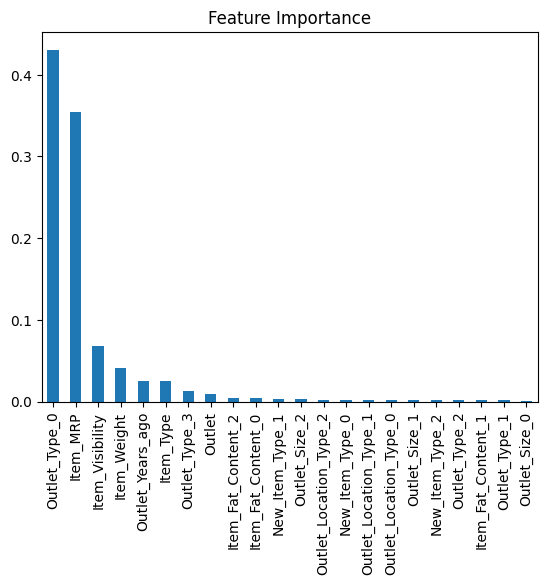

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_5 = RandomForestRegressor()
train(model_5, x, y)
coef = pd.Series(model_5.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
!pip install -q gradio

In [ ]:
!pip install --upgrade httpcore httpx


In [ ]:
import gradio as gr

In [ ]:

models = {
    "Linear Regression": model_1,
    "Lasso": model_2,
    "Ridge": model_3,
    "Random Forest": model_4,
    "Decision Tree": model_5
}

def predict(model_name, Item_Weight, Item_Visibility,	Item_Type,	Item_MRP,	Outlet_Years_ago ,Outlet, Item_Fat_Content_0	,Item_Fat_Content_1,	Item_Fat_Content_2,	Outlet_Size_0,	Outlet_Size_1,	Outlet_Size_2,	Outlet_Location_Type_0,	Outlet_Location_Type_1,	Outlet_Location_Type_2,	Outlet_Type_0, Outlet_Type_1,	Outlet_Type_2,	Outlet_Type_3,	New_Item_Type_0,	New_Item_Type_1,	New_Item_Type_2):
    # Get selected model
    model = models.get(model_name)

    if model is None:
        return "Invalid model selection."
    # Check if any input is None
    if None in [Item_Weight, Item_Visibility,	Item_Type,	Item_MRP,	Outlet_Years_ago ,Outlet, Item_Fat_Content_0	,Item_Fat_Content_1,	Item_Fat_Content_2,	Outlet_Size_0,	Outlet_Size_1,	Outlet_Size_2,	Outlet_Location_Type_0,	Outlet_Location_Type_1,	Outlet_Location_Type_2,	Outlet_Type_0, Outlet_Type_1,	Outlet_Type_2,	Outlet_Type_3,	New_Item_Type_0,	New_Item_Type_1,	New_Item_Type_2]:
        return "Please fill in all fields."


    # Make prediction
    input_data = np.array([[Item_Weight, Item_Visibility,	Item_Type,	Item_MRP,	Outlet_Years_ago ,Outlet, Item_Fat_Content_0	,Item_Fat_Content_1,	Item_Fat_Content_2,	Outlet_Size_0,	Outlet_Size_1,	Outlet_Size_2,	Outlet_Location_Type_0,	Outlet_Location_Type_1,	Outlet_Location_Type_2,	Outlet_Type_0, Outlet_Type_1,	Outlet_Type_2,	Outlet_Type_3,	New_Item_Type_0,	New_Item_Type_1,	New_Item_Type_2] ] )
    prediction =model.predict(input_data)[0]

    return f"Model: {model_name}\nPredicted Output: {prediction:.2f}"

# Define the model dropdown
model_dropdown = gr.Dropdown(
    choices=list(models.keys()),
    label="Select Model"
)

# Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility,	Item_Type,	Item_MRP,	Outlet_Identifier	,Outlet_Establishment_Year,	Item_Outlet_Sales,	Outlet_Years_ago ,Outlet, Item_Fat_Content_0	,Item_Fat_Content_1,	Item_Fat_Content_2,	Outlet_Size_0,	Outlet_Size_1,	Outlet_Size_2,	Outlet_Location_Type_0,	Outlet_Location_Type_1,	Outlet_Location_Type_2,	Outlet_Type_0, Outlet_Type_1,	Outlet_Type_2,	Outlet_Type_3,	New_Item_Type_0,	New_Item_Type_1,	New_Item_Type_2

# Define the input components
inputs = [
    model_dropdown,
    gr.Number(label="Item_Weight"),
    gr.Number(label="Item_Visibility"),
    gr.Number(label="Item_Type"),
    gr.Number(label="Item_MRP"),
    # gr.Number(label="Outlet_Identifier"),
    # gr.Number(label="Outlet_Establishment_Year"),
    # gr.Number(label="Item_Outlet_Sales"),
    gr.Number(label="Outlet_Years_ago"),
    gr.Number(label="Outlet"),
    gr.Number(label="Item_Fat_Content_0"),
    gr.Number(label="Item_Fat_Content_1"),
    gr.Number(label="Item_Fat_Content_2"),
    gr.Number(label="Outlet_Size_0"),
    gr.Number(label="Outlet_Size_1"),
    gr.Number(label="Outlet_Size_2"),
    gr.Number(label="Outlet_Location_Type_0"),
    gr.Number(label="Outlet_Location_Type_1"),
    gr.Number(label="Outlet_Location_Type_2"),
    gr.Number(label="Outlet_Type_0"),
    gr.Number(label="Outlet_Type_1"),
    gr.Number(label="Outlet_Type_2"),
    gr.Number(label="Outlet_Type_3"),
    gr.Number(label="New_Item_Type_0"),
    gr.Number(label="New_Item_Type_1"),
    gr.Number(label="New_Item_Type_2"),

]

iface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=gr.Textbox(),
    live=True
)



iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c8fea4c4e149d0d54e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
